As the first step I import all the libraries that will be used in future.

In [48]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np

Then I upload the dataset and take a look at it.

In [49]:
df = pd.DataFrame(pd.read_csv('insurance.csv'))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


As I see, columns sex, smoker and region aren't represented in numeric format and so Python couldn't handle it with ease.
So I need to convert them in numeric format using .astype and .cat.codes. And in the end take a look if everything went well.

In [50]:
df["sex"] = df["sex"].astype('category')
df["smoker"] = df["smoker"].astype('category')
df["region"] = df["region"].astype('category')
df["sex"] = df["sex"].cat.codes
df["smoker"] = df["smoker"].cat.codes
df["region"] = df["region"].cat.codes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


To define columns with biggest impact on the result, I will use Pearson's r coefficient.

In [51]:
def pr(x, y):
    coef, pval = pearsonr(x,y)
    return coef, pval

prage = pr(df['age'], df['charges'])
prsex = pr(df['sex'], df['charges'])
prbmi = pr(df['bmi'], df['charges'])
prch = pr(df['children'], df['charges'])
prsm = pr(df['smoker'], df['charges'])
prrg = pr(df['region'], df['charges'])

pearsonc = pd.DataFrame({'Age': prage, 'Sex': prsex, 'Bmi': prbmi, 'Children': prch, 'Smoker': prsm, 'Region': prrg}, index=['Pearsons r', 'p-value'])
pearsonc

,Age,Sex,Bmi,Children,Smoker,Region
Pearsons r,2.990082e-01,0.057292,1.983410e-01,0.067998,7.872514e-01,-0.006208
p-value,4.886693e-29,0.036133,2.459086e-13,0.012852,8.271436e-283,0.820518


As I see: age, bmi and smoker have the biggest impact on charges, while sex and children have very little impact, and region has even negative, so I am not going to use sex, children and region columns for training and testing my ML model.

Then I take a look at graphical interpretation and see if there are any patterns.

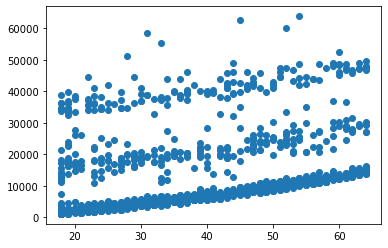

In [52]:
plt.scatter(df['age'], df['charges'])

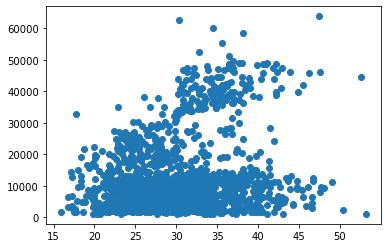

In [53]:
plt.scatter(df['bmi'], df['charges'])

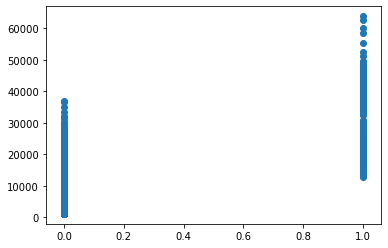

In [54]:
plt.scatter(df['smoker'], df['charges'])

As we see, I can try to divide data into clusters by age and bmi, yet, as I think, it wouldn't make any good because any age can be seen in any of 3 clusters we would have, so it would be useful if we were trying to predict age, based on charges, but not in our case.

Then I define which part of my dataset is a dependent variable (X) and which is an independent (Y).

In [55]:
X = df[['age', 'bmi', 'smoker']]
Y = df[['charges']]
X = preprocessing.StandardScaler().fit_transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Next part is preprocessing data and making it suitable for polynomial regression, which I will use.

In [56]:
X = preprocessing.StandardScaler().fit_transform(X)
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X)

Then i use train_test_split to, obviously, split the data into train and test sets, and, after iterating couple test sizes, I figured out that 0.084 gives the best result in terms of MSE.

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(x_poly, Y, test_size = 0.084, random_state = 5)

Almost in the end I fit the model on train data and make it predict Y on the test part.

In [58]:
pr = LinearRegression()
pr.fit(X_train, Y_train)
yhat = pr.predict(X_test)

The last part of my work is to evaluate my ML model's accuracy using MSE, R2

In [59]:
mse = metrics.mean_squared_error(Y_test, yhat)
mae = metrics.mean_absolute_error(Y_test, yhat)
rmse = np.sqrt(mse)

r2 = r2_score(Y_test,yhat)
qual = pd.DataFrame({'MSE': mse,'MAE': mae, 'RMSE': rmse, 'R2': r2}, index = ['Polynomial Regression'])
qual

,MSE,MAE,RMSE,R2
Polynomial Regression,1.414290e+07,2679.036687,3760.70442,0.898263


As we see, MAE is about 2680, so I can say that my ML model's average error is 2680.

Thanks for going through my test task!